In [36]:
include("src/Elise.jl");

In [37]:
Random.seed!(1234);

---

## Config

In [38]:
const cfg = Config(η=1e-4, a=12, b=0.5, λ=0.8)
dump(cfg)

Config
  dt: Float64 0.1
  E_exc: Float64 1.0
  E_inh: Float64 -1.0
  g_l: Float64 0.1
  g_den: Float64 2.0
  g_e: Float64 0.3
  g_i: Float64 0.9
  δ: Float64 25.0
  η: Float64 0.0001
  λ: Float64 0.8
  a: Float64 12.0
  b: Float64 0.5


In [39]:
#rho(u::Float64, a::Float64, b::Float64)::Float64 = max(u,0)

---

## Data

Reading target from midi file. We also get the needed number of output neurons (with possibly some silent in the middle, it is just the highest note - the lowest note) and the needed simulation time in ms.

In [40]:
#target = t->(1/12).*[6+2*sin(t*cfg.dt)-5*sin((2/3)*t*cfg.dt),6+2*cos(t*cfg.dt)+5*cos((2/3)*t*cfg.dt)];

In [41]:
#target = t->.5 .+0.4*[.8+(1-cos(t*cfg.dt))*cos(t*cfg.dt), (1-cos(t*cfg.dt))*sin(t*cfg.dt)];

In [72]:
function target(t) 
    t = (t *cfg.dt) % (4*pi)
    return 0.25*((t<2*pi+cfg.dt) ? [2*(1+sin(t)),1+cos(t),0.5(4+0.5*(t)*(t-2*pi))] : [2*(1-sin(-t)),3-cos(-t),0.5*(4+-0.5*(t-4*pi)*(t-2*pi))]);
end

target (generic function with 1 method)

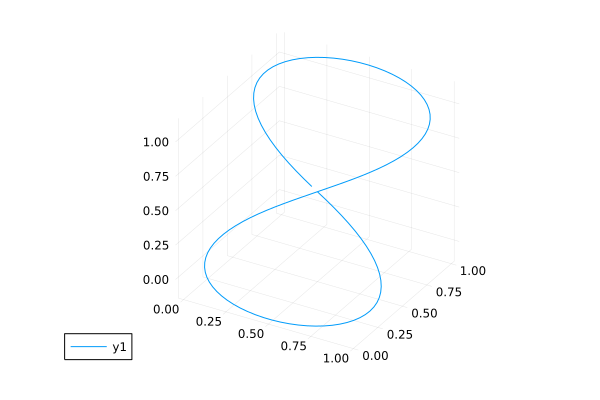

In [73]:
using Plots
T_min::Float64 = 0.
T_max::Float64 = 4*pi*10 #T_end = size(Target, 2) / cfg.dt - cfg.dt
p = mapreduce(permutedims,vcat,target.(0:4*pi*10))
Plots.plot(p[:,1], p[:,2],  p[:,3])

---

## Parameters

In [74]:
N_out::Int = 3
N_latent::Int = 50;
N::Int = N_out + N_latent;
(N=N, N_latent=N_latent, N_out=N_out)

(N = 53, N_latent = 50, N_out = 3)

In [75]:
W::Matrix{Float64} = rand(Normal(0., 0.0005), N, N);
const B::Matrix{Float64} = Float64.(rand(N_latent, N) .< 1.5/N);
const τ_d::Vector{Float64} = rand(Uniform(cfg.dt, 20), N);
const τ_s::Vector{Float64} = rand(Uniform(cfg.dt, 20), N);

In [76]:
args = [W, B, τ_d, τ_s, cfg, target, T_min, T_max];

---

## Training 

In [82]:
train!(args..., 1000)

---

## Running and plotting

In [85]:
N_run::Int =5
nudge_on_run_nb(n) = n < 2
r, u, v = run!(args..., N_run, nudge_on_run_nb,record_t=t->true);

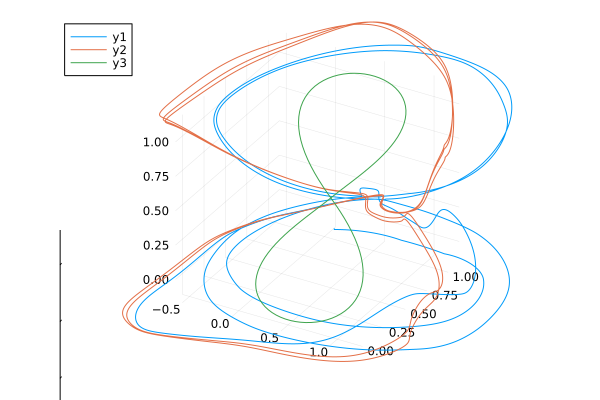

In [87]:
using Plots
Plots.plot(u[1,begin:end÷2], u[2,begin:end÷2], aspect_ratio=1)
Plots.plot!(u[1,end÷2+1:end], u[2,end÷2+1:end])
p = mapreduce(permutedims,vcat,target.(0:4*pi*10+1))
Plots.plot!(p[:,1], p[:,2], p[:,3])

In [88]:
using Plots
p = mapreduce(permutedims,vcat,target.(0:4*pi*10+1))
anim = @animate for i in 1:10:size(r,2)
    Plots.plot(u[1,begin:i], u[2,begin:i], aspect_ratio=1, c=(i>size(r,2)/2) ? :red : :blue, legend=nothing)
    Plots.plot!(p[:,1], p[:,2], p[:,3])
end

Animation("/tmp/jl_zFGthE", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000620.png", "000621.png", "000622.png", "000623.png", "000624.png", "000625.png", "000626.png", "000627.png", "000628.png", "000629.png"])

┌ Info: Saved animation to /home/arno/ELiSE.jl/assets/3d.gif
└ @ Plots /home/arno/.julia/packages/Plots/FFuQi/src/animation.jl:156


Plots.AnimatedGif("/home/arno/ELiSE.jl/assets/3d.gif")
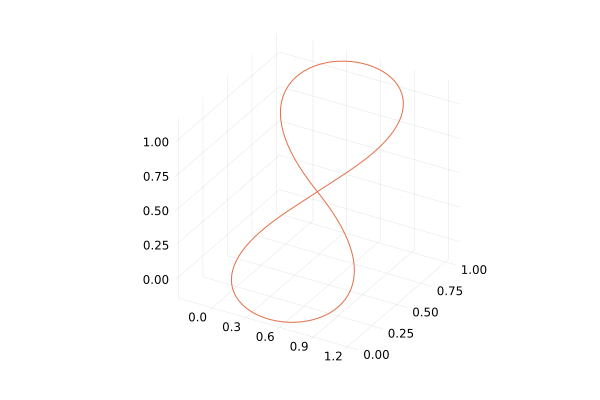

In [89]:
gif(anim, "assets/3d.gif", fps = 15)